29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7652 - loss: 0.6486 - val_accuracy: 0.8822 - val_loss: 0.3321
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.8811 - loss: 0.3284 - val_accuracy: 0.8908 - val_loss: 0.2945
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9021 - loss: 0.2641 - val_accuracy: 0.8985 - val_loss: 0.2730
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9142 - loss: 0.2320 - val_accuracy: 0.9008 - val_loss: 0.2744
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9257 - loss: 0.2019 - val_accuracy: 0.9077 - val_loss: 0.2557
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9370 - loss: 0.1735 - val_accuracy: 0.9118 - val_loss: 0.2334
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9414 - loss: 0.1566 - val_accuracy: 0.9118 - val_loss: 0.2476
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9497 -

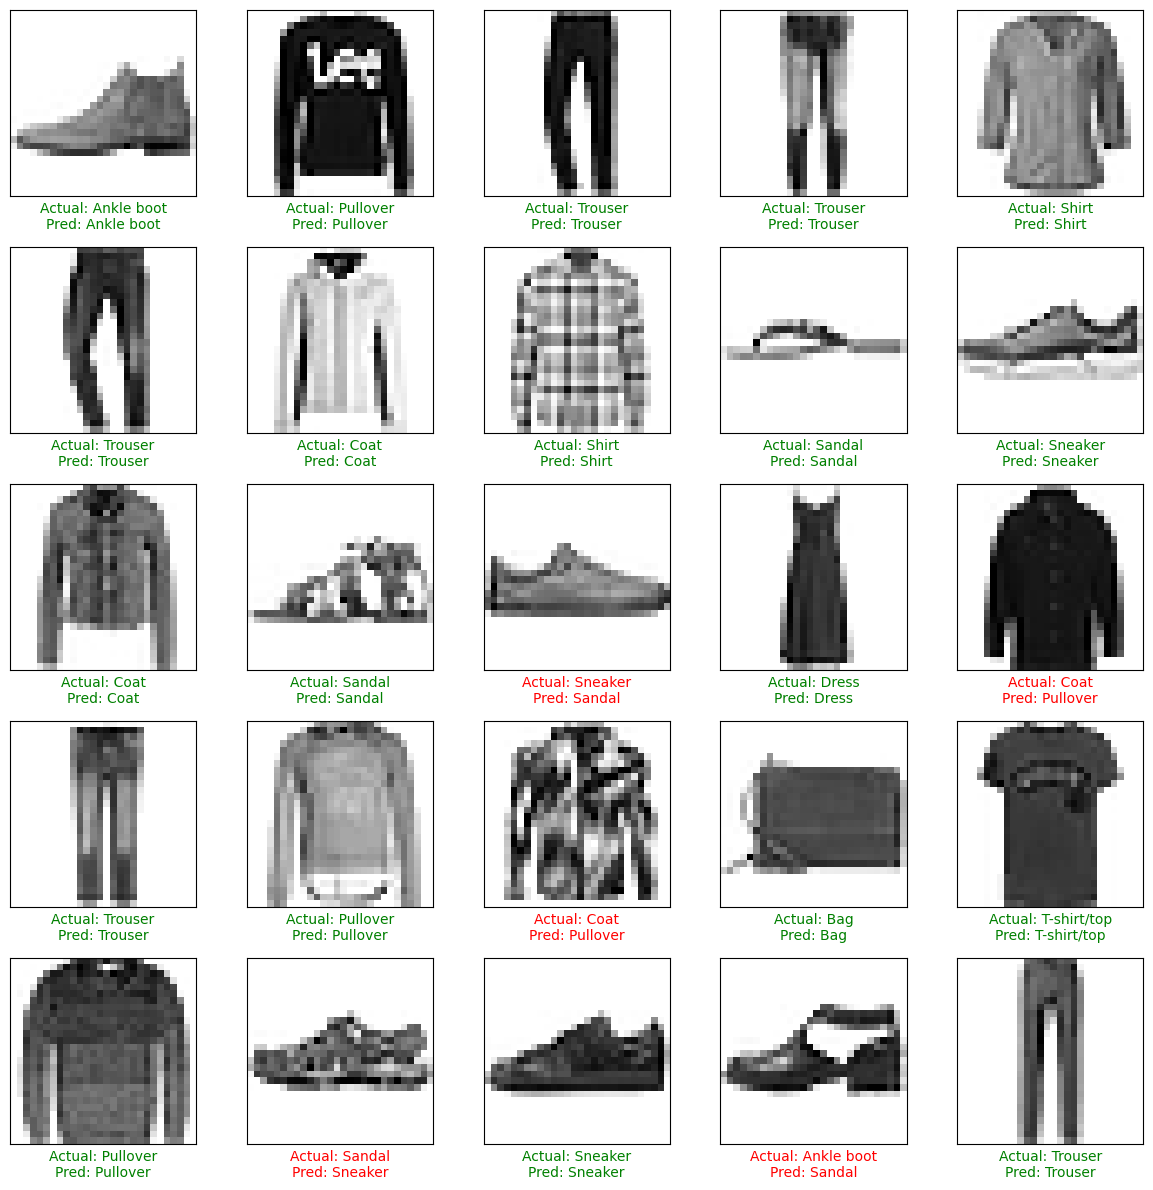

✅ Model saved as fashion_mnist_cnn_model.h5


In [1]:
# Fashion MNIST - CNN Project
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add channel dimension (CNNs expect 3D input)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n🎯 Test accuracy:", test_acc)

# Predictions
predictions = model.predict(test_images)

# Visualization function
def plot_images(images, labels, predictions, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        color = 'green' if predicted_label == labels[i] else 'red'
        plt.xlabel(f"Actual: {class_names[labels[i]]}\nPred: {class_names[predicted_label]}", color=color)
    plt.tight_layout()
    plt.show()

plot_images(test_images, test_labels, predictions, class_names)

# Save model
model.save("fashion_mnist_cnn_model.h5")
print("✅ Model saved as fashion_mnist_cnn_model.h5")


In [3]:
from tensorflow.keras.models import load_model
model = load_model("fashion_mnist_cnn_model.h5")


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9037 - loss: 0.3194
Test accuracy: 0.9082000255584717


In [5]:
from tensorflow.keras.models import load_model

# Load the previously trained and saved model
model = load_model("fashion_mnist_cnn_model.h5")

# Check model structure
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,036 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [7]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST test data
(_, _), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (important!)
test_images = test_images / 255.0


In [8]:
# Get model predictions
predictions = model.predict(test_images)

# Each prediction is a 10-element array — pick the index with the highest probability
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


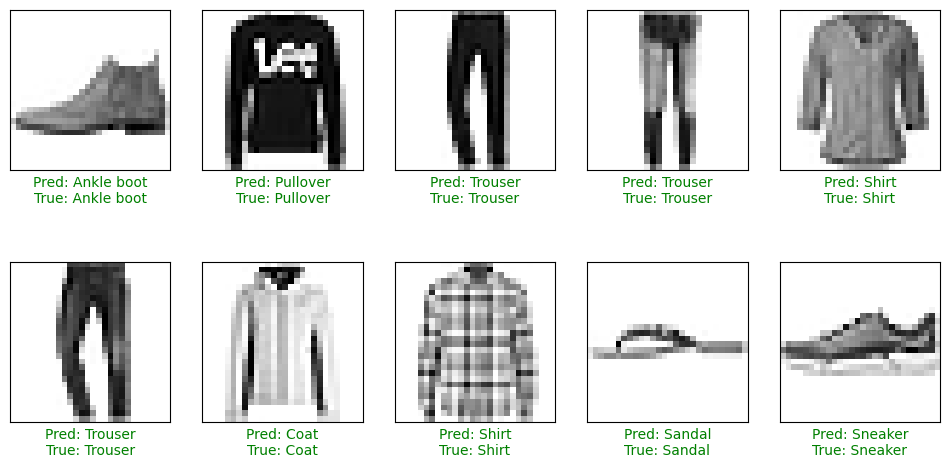

In [9]:
# Class names for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot first 10 images with their predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    color = 'green' if predicted_labels[i] == test_labels[i] else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}", color=color)
plt.show()


In [10]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
from PIL import Image, ImageOps

# Upload an image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess
    img = Image.open(fn).convert('L')  # convert to grayscale
    img = ImageOps.invert(img)         # invert colors if background is white
    img = img.resize((28, 28))         # resize to 28x28

    img_array = np.array(img) / 255.0
    img_array = img_array.reshape((1, 28, 28))  # reshape for model

    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    print(f"Predicted: {class_names[predicted_label]}")


Saving shirt.jpg to shirt.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: Shirt


In [11]:
from google.colab import files
uploaded = files.upload()


Saving shirt.jpg to shirt (1).jpg


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image, ImageOps

for fn in uploaded.keys():
    img = Image.open(fn).convert('L')  # grayscale
    img = ImageOps.invert(img)         # invert colors if needed
    img = img.resize((28, 28))         # resize

    img_array = np.array(img) / 255.0
    img_array = img_array.reshape((1, 28, 28))

    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    print(f"🧠 Predicted: {class_names[predicted_label]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
🧠 Predicted: Shirt
